# Initialization

In [33]:
import random
import nltk
from nltk.corpus import words
import numpy as np

MEANING_OF_LIFE = 42
NUM_ELEMENTS = 100000  # 100k elements
NUM_UNIQUE = 10000  # 10k unique elements
NUM_RUNS = 25

# Seed the random number generator
random.seed(MEANING_OF_LIFE)

nltk.download('words')

word_list = words.words()
random.shuffle(word_list)

# Sample 10k distinct elements
unique_words = set(word_list)
distinct_elements = list(unique_words)[:NUM_UNIQUE]

# Ensure all unique elements are included in the stream
stream = distinct_elements + random.choices(distinct_elements, k=NUM_ELEMENTS - NUM_UNIQUE)

# Verify the results
print(f"Total elements in the stream: {len(stream)}")
print(f"Distinct elements in the stream: {len(set(stream))}")
print(f"First 10 elements in the stream: {stream[:10]}")

# Generate sketches
sketch_sizes = np.logspace(1, 5, num=20, base=10, dtype=int)
print(f"Sketch sizes: {sketch_sizes}")

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\galno\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Total elements in the stream: 100000
Distinct elements in the stream: 10000
First 10 elements in the stream: ['bac', 'amphorophony', 'sensitize', 'Parnassus', 'bardship', 'aerophagy', 'prenares', 'knebelite', 'forecastleman', 'merotomize']
Sketch sizes: [    10     16     26     42     69    112    183    297    483    784
   1274   2069   3359   5455   8858  14384  23357  37926  61584 100000]


In [34]:
import hashlib

def random_hash(element, seed=MEANING_OF_LIFE):
    """
    Generate a random hash for the element using the seed, and return a value between 0 and 1.
    """
    hash_value = hashlib.md5(f"{element}{seed}".encode()).hexdigest()
    return int(hash_value, 16) / 2**128

## Flajolet Martin

### Flajolet Martin - Alpha Version

In [35]:
def flajolet_martin(stream: np.ndarray) -> float:
    """
    Flajolet-Martin algorithm for counting distinct elements in a stream.
    :param stream: numpy array of elements
    :return: estimated number of distinct elements
    """
    X = 1  # Initialize the maximum possible hash value
    for element in stream:
        hash_value = random_hash(element)
        if hash_value < X:
            X = hash_value
    return 1 / X

Run the Alpha version 25 times for each sketch size

In [36]:
results = {size: [] for size in sketch_sizes}

for sketch_size in sketch_sizes:
    for _ in range(NUM_RUNS):
        results[sketch_size].append(flajolet_martin(stream[:sketch_size]))
    print(f"Finished sketch size {sketch_size}")

Finished sketch size 10
Finished sketch size 16
Finished sketch size 26
Finished sketch size 42
Finished sketch size 69
Finished sketch size 112
Finished sketch size 183
Finished sketch size 297
Finished sketch size 483
Finished sketch size 784
Finished sketch size 1274
Finished sketch size 2069
Finished sketch size 3359
Finished sketch size 5455
Finished sketch size 8858
Finished sketch size 14384
Finished sketch size 23357
Finished sketch size 37926
Finished sketch size 61584
Finished sketch size 100000


For each sketch size, calculate accuracy, bias, normalized-variance 

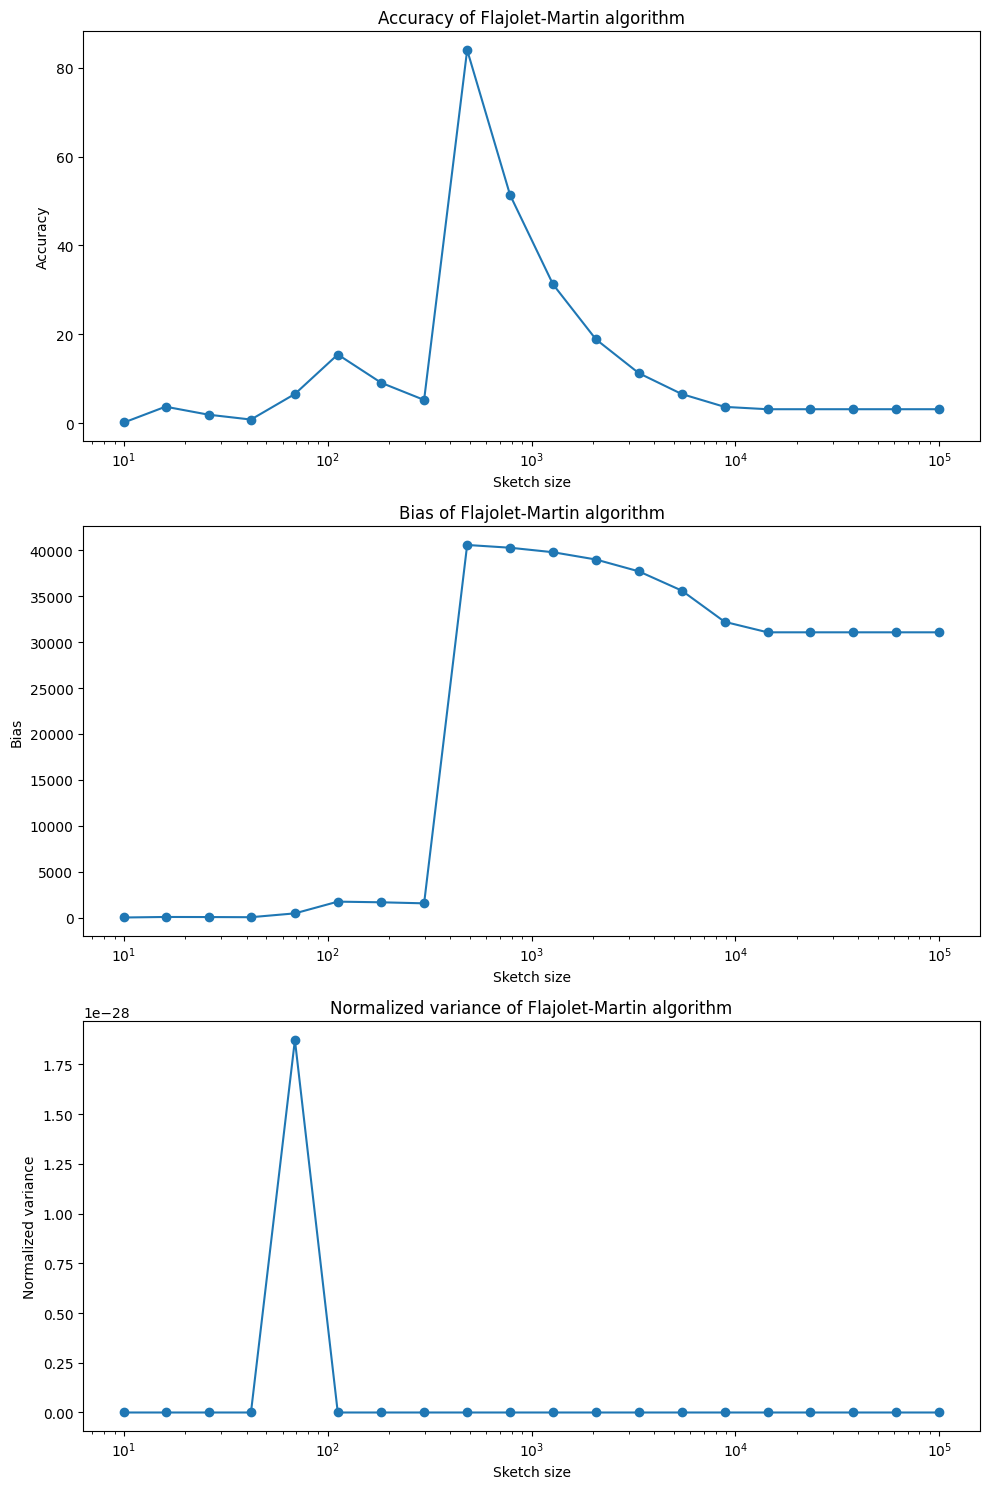

In [37]:
import matplotlib.pyplot as plt

metrics = {}
for sketch_size, estimates in results.items():
    true_unique = len(np.unique(stream[:sketch_size]))
    estimates = np.array(estimates)
    accuracy = np.mean(np.abs(estimates - true_unique) / true_unique)
    bias = np.mean(estimates) - true_unique
    normalized_variance = np.var(estimates) / (true_unique)
    metrics[sketch_size] = (accuracy, bias, normalized_variance)

# Create a figure and axis
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot the accuracy
axs[0].plot(list(metrics.keys()), [m[0] for m in metrics.values()], marker='o')
axs[0].set_xscale('log')
axs[0].set_xlabel("Sketch size")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy of Flajolet-Martin algorithm")

# Plot the bias
axs[1].plot(list(metrics.keys()), [m[1] for m in metrics.values()], marker='o')
axs[1].set_xscale('log')
axs[1].set_xlabel("Sketch size")
axs[1].set_ylabel("Bias")
axs[1].set_title("Bias of Flajolet-Martin algorithm")

# Plot the normalized variance
axs[2].plot(list(metrics.keys()), [m[2] for m in metrics.values()], marker='o')
axs[2].set_xscale('log')
axs[2].set_xlabel("Sketch size")
axs[2].set_ylabel("Normalized variance")
axs[2].set_title("Normalized variance of Flajolet-Martin algorithm")

plt.tight_layout()
plt.show()